# Final setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_friedman1
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import json
from sklearn.dummy import DummyRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from utils import FriedmanDataset, run_kfold_visualizer, ModelOptimizerFinal 

In [2]:
# Data Creation
n_train= 500
n_test= 100000
n_features = 10
FD_noise= 0
transformation='log'
seed=42

# Stratification
n_groups = 20

# RandomSearchCV
n_folds = 5
n_iter= 20
n_repetitions= 3
scoring= 'neg_mean_squared_error' 
n_jobs= -1
json_file = "./results.json" # set path to save json-file 

RF_param_grid = {
    'n_estimators': np.arange(500, 1001),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': np.arange(1, n_features + 1) #@nadja is that right?
}

# Initalize Model
modelOptimizer = ModelOptimizerFinal(RandomForestRegressor(random_state=seed), 
                                RF_param_grid,
                                random_state=seed)

# Save Parameters in a dictionary
params = {'model': modelOptimizer.model.__class__.__name__,
          'n_train': n_train,
          'n_test': n_test,
          'n_features': n_features,
          'FD_noise': FD_noise,
          'transformation': transformation,
          'n_groups': n_groups,
          'n_folds': n_folds,
          'n_iter': n_iter,
          'n_repetitions': n_repetitions,
          'scoring': scoring, 
          'n_jobs': n_jobs,
          'json_file': json_file}
params

{'model': 'RandomForestRegressor',
 'n_train': 500,
 'n_test': 100000,
 'n_features': 10,
 'FD_noise': 0,
 'transformation': 'log',
 'n_groups': 20,
 'n_folds': 5,
 'n_iter': 20,
 'n_repetitions': 3,
 'scoring': 'neg_mean_squared_error',
 'n_jobs': -1,
 'json_file': './results.json'}

In [3]:
#random_states=[410, 1825, 42]

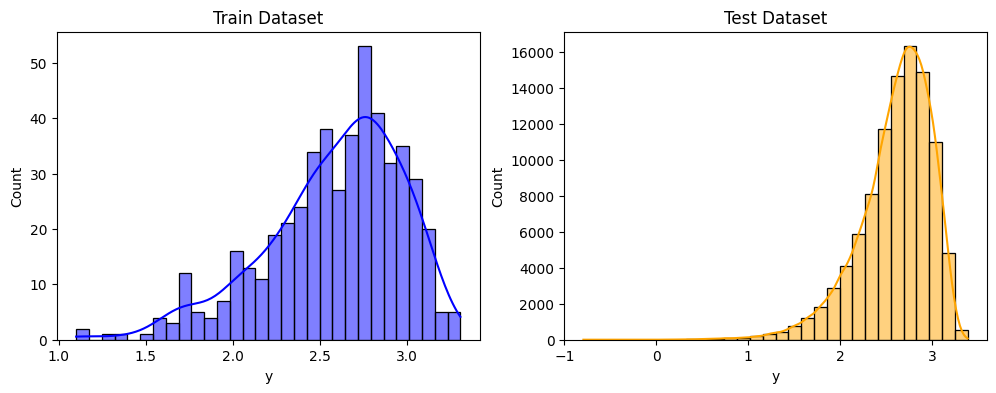

In [4]:
train = FriedmanDataset(n_samples=n_train, 
                            n_features=n_features, 
                            noise=FD_noise, 
                            random_state=42)
train.transform(transformation=transformation)

test = FriedmanDataset(n_samples=n_test,
                           n_features=n_features,
                           noise=FD_noise,
                           random_state=1718)
test.transform(transformation=transformation)


# Show here histograms of train and train datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train.df, x='y', bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Train Dataset')

sns.histplot(test.df, x='y', bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Test Dataset')

plt.show()

In [5]:
unstratified_results, stratified_results = modelOptimizer.optimize(params#,
                                                                   #random_states=random_states
                                                                   )

RandomizesdSearchCV with params n_folds = 5 , ngroups:  20 , scoring:  neg_mean_squared_error , n_jobs:  -1 , n_iter:  20  and save to   ./results.json 

Best Parameters: {'n_estimators': 794, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 5}
Evaluation Results of Random Split Cross-validation :  {'train r2': 0.8609, 'test r2': 0.7758, 'train mse': 0.02, 'test mse': 0.0358, 'train mae': 0.0918, 'test mae': 0.1357}
Best Parameters: {'n_estimators': 760, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': 8}
Evaluation Results of Stratified Split Cross-validation :  {'train r2': 0.8752, 'test r2': 0.7792, 'train mse': 0.018, 'test mse': 0.0353, 'train mae': 0.0914, 'test mae': 0.1362}
Best Parameters: {'n_estimators': 923, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 8}
Evaluation Results of Random Split Cross-validation :  {'train r2': 0.9499, 'test r2': 0.7986, 'train mse': 0.0086, 'test mse': 0.0322, 'train mae': 0.0579, 'test mae': 0.131

In [4]:
results={}

In [6]:
results.update({'iteration0': {'train r2': 0.5,
                              'test r2': 0.4}})

In [7]:
results

{'iteration0': {'train r2': 0.5, 'test r2': 0.4}}